<a href="https://github.com/Goodnight77/GenerativeAI_bootcamp/blob/main/NLP_pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###  Text Cleaning :

In [ ]:
import re
text = """<gdg>
#GDG is a community
url <https://www.gdgcarthage.org/>,
email <gdg.carthage@gmail.com>
"""
def clean_text(text):
    # remove HTML TAG
    html = re.compile('[<,#*?>]')
    text = html.sub(r'',text)
    # Remove urls:
    url = re.compile('https?://\S+|www\.S+')
    text = url.sub(r'',text)
    # Remove email id:
    email = re.compile('[A-Za-z0-2]+@[\w]+.[\w]+')
    text = email.sub(r'',text)
    return text
print(clean_text(text))

gdg
GDG is a community
url 
email gdg.



###  Text Preprocessing

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('maxent_ne_chunker_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /roo

True

#### NER & POS

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from nltk.tag import pos_tag
from nltk.chunk import ne_chunk
import string

# sample text to be preprocessed
text = """GDG is an independent group; our activities and the opinions expressed
          here should in no way be linked to Google,
          the corporation. To learn more about the GDG program,
          visit https://developers.google.com/community/gdg/"""

# tokenize the text
tokens = word_tokenize(text)

# remove stop words
stop_words = set(stopwords.words('english'))
filtered_tokens = [token for token in tokens if token.lower() not in stop_words]

# perform stemming and lemmatization
stemmer = SnowballStemmer('english')
lemmatizer = WordNetLemmatizer()
stemmed_tokens = [stemmer.stem(token) for token in filtered_tokens]
lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]

# remove digits and punctuation
cleaned_tokens = [token for token in lemmatized_tokens
				if not token.isdigit() and not token in string.punctuation]

# convert all tokens to lowercase
lowercase_tokens = [token.lower() for token in cleaned_tokens]

# perform part-of-speech (POS) tagging
pos_tags = pos_tag(lowercase_tokens)

# perform named entity recognition (NER)
named_entities = ne_chunk(pos_tags)

# print the preprocessed text
print("Original text:", text)
print("Preprocessed tokens:", lowercase_tokens)
print("POS tags:", pos_tags)
print("Named entities:", named_entities)


Original text: GDG is an independent group; our activities and the opinions expressed
          here should in no way be linked to Google,
          the corporation. To learn more about the GDG program,
          visit https://developers.google.com/community/gdg/
Preprocessed tokens: ['gdg', 'independent', 'group', 'activity', 'opinion', 'expressed', 'way', 'linked', 'google', 'corporation', 'learn', 'gdg', 'program', 'visit', 'http', '//developers.google.com/community/gdg/']
POS tags: [('gdg', 'JJ'), ('independent', 'JJ'), ('group', 'NN'), ('activity', 'NN'), ('opinion', 'NN'), ('expressed', 'VBD'), ('way', 'NN'), ('linked', 'VBN'), ('google', 'JJ'), ('corporation', 'NN'), ('learn', 'NN'), ('gdg', 'NN'), ('program', 'NN'), ('visit', 'NN'), ('http', 'NN'), ('//developers.google.com/community/gdg/', 'NN')]
Named entities: (S
  gdg/JJ
  independent/JJ
  group/NN
  activity/NN
  opinion/NN
  expressed/VBD
  way/NN
  linked/VBN
  google/JJ
  corporation/NN
  learn/NN
  gdg/NN
  program/NN


### Feature *Engineering*

#### One Hot Encoder

In [ ]:
import nltk
# nltk.download('punkt') # Download 'punkt'
# from nltk if it's not downloaded
from nltk.tokenize import sent_tokenize
Text = """Go data science hackathon.
		NLP Learning Together.
		today NLP workshop.
		Learning NLP techniques"""
sentences = sent_tokenize(Text)
sentences = [sent.lower().replace(".", "") for sent in sentences]
print('Tokenized Sentences :', sentences)

# Create the vocabulary
vocab = {}
count = 0
for sent in sentences:
	for word in sent.split():
		if word not in vocab:
			count = count + 1
			vocab[word] = count
print('vocabulary :', vocab)

# One Hot Encoding
def OneHotEncoder(text):
	onehot_encoded = []
	for word in text.split():
		temp = [0]*len(vocab)
		if word in vocab:
			temp[vocab[word]-1] = 1
			onehot_encoded.append(temp)
	return onehot_encoded


# print('\n',sentences[0])
print('OneHotEncoded vector for sentence : "',
	sentences[0], '"is \n', OneHotEncoder(sentences[0]))


Tokenized Sentences : ['go data science hackathon', 'nlp learning together', 'today nlp workshop', 'learning nlp techniques']
vocabulary : {'go': 1, 'data': 2, 'science': 3, 'hackathon': 4, 'nlp': 5, 'learning': 6, 'together': 7, 'today': 8, 'workshop': 9, 'techniques': 10}
OneHotEncoded vector for sentence : " go data science hackathon "is 
 [[1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]]


#### Bag of Word(Bow)

1. Words in vocabulary: ['google', 'developer', 'group']

* developer → Index 0 → 1 occurrence
* google → Index 1 → 1 occurrence
* group → Index 2 → 1 occurrence
that's why we have [1 1 1 0 0 0 0 0 0]
also,
2. Words in vocabulary: ['google', 'learning', 'together']

* google → Index 1 → 1 occurrence
* learning → Index 3 → 1 occurrence
* together → Index 7 → 1 occurrence
* All other words are absent (0s).




In [ ]:
import nltk
#nltk.download('punkt') # Download 'punkt' from nltk if it's not downloaded
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction.text import CountVectorizer
Text = Text
# TOKENIZATION
sentences = sent_tokenize(Text)
sentences = [sent.lower().replace(".","") for sent in sentences]
print('Our Corpus:',sentences)
#CountVectorizer : Convert a collection of text documents to a matrix of token counts.
count_vect = CountVectorizer()
# fit & transform will represent each sentences as BOW representation
BOW = count_vect.fit_transform(sentences)
# Get the vocabulary
print("Our vocabulary: ", count_vect.vocabulary_)
#see the BOW representation
print(f"BoW representation for {sentences[0]} {BOW[0].toarray()}")
print(f"BoW representation for {sentences[1]} {BOW[1].toarray()}")
print(f"BoW representation for {sentences[2]} {BOW[2].toarray()}")
# BOW representation for a new text
BOW_ = count_vect.transform(["learning what is nlp "])
print("Bow representation for 'learning what is nlp ':", BOW_.toarray())


Our Corpus: ['google developer group', 'google learning together', 'today nlp workshop', 'learning nlp techniques']
Our vocabulary:  {'google': 1, 'developer': 0, 'group': 2, 'learning': 3, 'together': 7, 'today': 6, 'nlp': 4, 'workshop': 8, 'techniques': 5}
BoW representation for google developer group [[1 1 1 0 0 0 0 0 0]]
BoW representation for google learning together [[0 1 0 1 0 0 0 1 0]]
BoW representation for today nlp workshop [[0 0 0 0 1 0 1 0 1]]
Bow representation for 'learning what is nlp ': [[0 0 0 1 1 0 0 0 0]]


#### Bag of n-grams

Your vocabulary includes:

1. Unigrams (single words): 'go', 'data', 'science', 'hackathon', etc.
2. Bigrams (two-word phrases): 'go data', 'data science', etc.
3. Trigrams (three-word phrases): 'go data science', 'data science hackathon', etc.
Each n-gram is indexed in the vocabulary.

* example: "go data science hackathon"
[1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0]
* "go" → ✅ (1)
* "data" → ✅ (1)
* "science" → ✅ (1)
* "hackathon" → ✅ (1)
* "go data" → ✅ (1)
* "data science" → ✅ (1)
* "science hackathon" → ✅ (1)
* "go data science" → ❌ (0)
* "data science hackathon" → ❌ (0)

* Usage : Text classification, topic modeling, search engines
* Purpose : Capture word sequences

In [ ]:
import nltk
# nltk.download('punkt') # Download 'punkt'
# from nltk if it's not downloaded
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction.text import CountVectorizer

Text = """Go data science hackathon.
		NLP Learning Together.
		today NLP workshop.
		Learning NLP techniques"""

# TOKENIZATION
sentences = sent_tokenize(Text)
sentences = [sent.lower().replace(".", "") for sent in sentences]
print('Our Corpus:', sentences)

# Ngram vectorization example with count
# vectorizer and uni, bi, trigrams
count_vect = CountVectorizer(ngram_range=(1, 3))

# fit & transform will represent each sentences
# as Bag of n-grams representation
BOW_nGram = count_vect.fit_transform(sentences)

# Get the vocabulary
print("Our vocabulary:\n", count_vect.vocabulary_)

# see the Bag of n-grams representation
print('Ngram representation for "{}" is {}'
	.format(sentences[0], BOW_nGram[0].toarray()))
print('Ngram representation for "{}" is {}'
	.format(sentences[1], BOW_nGram[1].toarray()))
print('Ngram representation for "{}" is {}'.
	format(sentences[2], BOW_nGram[2].toarray()))

# Bag of n-grams representation for a new text
BOW_nGram_ = count_vect.transform(["learning NLP text preprocessing from this workshop"])
print("Ngram representation for 'learning NLP text preprocessing from this workshop' is",
	BOW_nGram_.toarray())


Our Corpus: ['go data science hackathon', 'nlp learning together', 'today nlp workshop', 'learning nlp techniques']
Our vocabulary:
 {'go': 3, 'data': 0, 'science': 16, 'hackathon': 6, 'go data': 4, 'data science': 1, 'science hackathon': 17, 'go data science': 5, 'data science hackathon': 2, 'nlp': 11, 'learning': 7, 'together': 22, 'nlp learning': 12, 'learning together': 10, 'nlp learning together': 13, 'today': 19, 'workshop': 23, 'today nlp': 20, 'nlp workshop': 15, 'today nlp workshop': 21, 'techniques': 18, 'learning nlp': 8, 'nlp techniques': 14, 'learning nlp techniques': 9}
Ngram representation for "go data science hackathon" is [[1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0]]
Ngram representation for "nlp learning together" is [[0 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0 1 0]]
Ngram representation for "today nlp workshop" is [[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 1 1 0 1]]
Ngram representation for 'learning NLP text preprocessing from this workshop' is [[0 0 0 0 0 0 0

#### TF-IDF

In [ ]:
import nltk
# nltk.download('punkt') # Download 'punkt'
# from nltk if it's not downloaded
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer

Text = """Go data science hackathon.
		NLP Learning Together.
		today NLP workshop.
		Learning NLP techniques"""

# TOKENIZATION
sentences = sent_tokenize(Text)
sentences = [sent.lower().replace(".", "") for sent in sentences]
print('Our Corpus:', sentences)

# TF-IDF
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(sentences)

# All words in the vocabulary.
print("vocabulary", tfidf.get_feature_names_out())
# IDF value for all words in the vocabulary
print("IDF for all words in the vocabulary :\n", tfidf.idf_)

# TFIDF representation for all documents in our corpus
print('\nTFIDF representation for "{}" is \n{}'
	.format(sentences[0], tfidf_matrix[0].toarray()))
print('TFIDF representation for "{}" is \n{}'
	.format(sentences[1], tfidf_matrix[1].toarray()))
print('TFIDF representation for "{}" is \n{}'
	.format(sentences[2],tfidf_matrix[2].toarray()))

# TFIDF representation for a new text
matrix = tfidf.transform(["learning NLP text preprocessing from this workshop"])
print("\nTFIDF representation for 'learning NLP text preprocessing from this workshop' is\n",
	matrix.toarray())


Our Corpus: ['go data science hackathon', 'nlp learning together', 'today nlp workshop', 'learning nlp techniques']
vocabulary ['data' 'go' 'hackathon' 'learning' 'nlp' 'science' 'techniques' 'today'
 'together' 'workshop']
IDF for all words in the vocabulary :
 [1.91629073 1.91629073 1.91629073 1.51082562 1.22314355 1.91629073
 1.91629073 1.91629073 1.91629073 1.91629073]

TFIDF representation for "go data science hackathon" is 
[[0.5 0.5 0.5 0.  0.  0.5 0.  0.  0.  0. ]]
TFIDF representation for "nlp learning together" is 
[[0.         0.         0.         0.55349232 0.44809973 0.
  0.         0.         0.70203482 0.        ]]
TFIDF representation for "today nlp workshop" is 
[[0.         0.         0.         0.         0.41137791 0.
  0.         0.64450299 0.         0.64450299]]

TFIDF representation for 'learning NLP text preprocessing from this workshop' is
 [[0.         0.         0.         0.55349232 0.44809973 0.
  0.         0.         0.         0.70203482]]


### Pre-Trained Word Embeddings

##### Word2vec by Google

In [ ]:
import gensim.downloader as api

# load the pre-trained Word2Vec model
model = api.load('word2vec-google-news-300')

# define word pairs to compute similarity for
word_pairs = [('learn', 'learning'), ('india', 'indian'), ('fame', 'famous')]

# compute similarity for each pair of words
for pair in word_pairs:
	similarity = model.similarity(pair[0], pair[1])
	print(f"Similarity between '{pair[0]}' and '{pair[1]}' using Word2Vec: {similarity:.3f}")


[==================================================] 100.0% 1662.8/1662.8MB downloaded
Similarity between 'learn' and 'learning' using Word2Vec: 0.637
Similarity between 'india' and 'indian' using Word2Vec: 0.697
Similarity between 'fame' and 'famous' using Word2Vec: 0.326


##### GloVe by Stanford

In [ ]:
!pip uninstall torchtext -y
!pip install torchdata --extra-index-url https://download.pytorch.org/whl/cu118 -q
!pip install torchtext --no-cache-dir -q

      Successfully uninstalled nvidia-cusparse-cu12-12.5.1.3
  Attempting uninstall: nvidia-cudnn-cu12
    Found existing installation: nvidia-cudnn-cu12 9.3.0.75
    Uninstalling nvidia-cudnn-cu12-9.3.0.75:
      Successfully uninstalled nvidia-cudnn-cu12-9.3.0.75
  Attempting uninstall: nvidia-cusolver-cu12
    Found existing installation: nvidia-cusolver-cu12 11.6.3.83
    Uninstalling nvidia-cusolver-cu12-11.6.3.83:
      Successfully uninstalled nvidia-cusolver-cu12-11.6.3.83
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 31.5 MB/s eta 0:00:00


In [ ]:
import torch
import torchtext.vocab as vocab

# load the pre-trained GloVe model
glove = vocab.GloVe(name='840B', dim=300)

# define word pairs to compute similarity for
word_pairs = [('learn', 'learning'), ('india', 'indian'), ('fame', 'famous')]

# compute similarity for each pair of words
for pair in word_pairs:
	vec1, vec2 = glove[pair[0]], glove[pair[1]]
	similarity = torch.dot(vec1, vec2) / (torch.norm(vec1) * torch.norm(vec2))
	print(f"Similarity between '{pair[0]}' and '{pair[1]}' using GloVe: {similarity:.3f}")


##### fasttext by Facebook
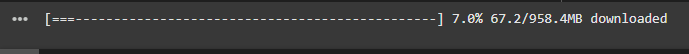

In [ ]:
import gensim.downloader as api

# load the pre-trained fastText model
fasttext_model = api.load("fasttext-wiki-news-subwords-300")

# define word pairs to compute similarity for
word_pairs = [('learn', 'learning'), ('india', 'indian'), ('fame', 'famous')]

# compute similarity for each pair of words
for pair in word_pairs:
	similarity = fasttext_model.similarity(pair[0], pair[1])
	print(f"Similarity between '{pair[0]}' and '{pair[1]}' using Word2Vec: {similarity:.3f}")
